# WHAT WILL MAKE STARBUCKS APP PROMOTIONS MORE SUCCESSFUL?
## *Step 1: Initial Exploratory Data Analysis & EDA*

In [2]:
! pip install --upgrade pip
! pip install pandas
! pip install seaborn
! pip install matplotlib


In [3]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# EXPLORE AND CLEAN PORTFOLIO DATAFRAME
The portfolio dataframe has the following features:
* reward - the amount of value of the discount or product that the customer will receive upon completion of the offer
* channels - the medium in which the promotion was communicated to the user.
* difficulty - the amount the user has to spend in order to complete the promo
* duration - the time in which the user must complete the promo in order to get the reward
* offer type - the type of offer sent tot he user.
    - bogo - buy one get one free
    - discount - the user attains a discount upon completing the offer
    - informational - ongoing Starbucks promotions sent to users

In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
portfolio.shape

(10, 6)

### OBSERVATIONS

* The portfolio dataframe has 10 columns with 6 rows.
* It does not have any null values.
* The channels are written in a list.
* Each row provides a unique offer. 

### ACTIONS
* Create a new column called offer which assigns numbers 1 - 10 for each type of offer. This will be used as offer_id in the final table for better readability.
* Extract each channel from the list of channels
* Use MultiLabelBinarizer to one hot encode list of channels.
* Create a column with duration by hour to match the units of the time indicated in the transactions table.
* Reorganize all columns.

In [7]:
portfolio_df = portfolio.copy()

In [8]:
portfolio_df['offer'] = portfolio.index + 1

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

# create an instance of the MultiLabelBinarizer class
mlb = MultiLabelBinarizer()

# fit and transform the column of lists into a binary matrix
encoded = mlb.fit_transform(portfolio_df['channels'])

# create a new DataFrame with the binary matrix
df_encoded = pd.DataFrame(encoded, columns=mlb.classes_)

# concatenate the new DataFrame with the original DataFrame
portfolio_df = pd.concat([portfolio_df, df_encoded], axis=1)

In [11]:
portfolio_df['duration_hr'] = portfolio_df['duration'] * 24

In [14]:
portfolio_df = portfolio_df[["id", "offer", "offer_type", "difficulty", "duration", "duration_hr", "reward", "channels", "web", "email", "social", "mobile"]]

In [15]:
portfolio_df.head(2)

,id,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,mobile
0,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,1,1
1,4d5c57ea9a6940dd891ad53e9dbe8da0,2,bogo,10,5,120,10,"[web, email, mobile, social]",1,1,1,1


In [40]:
# portfolio_df.to_csv('data/portfolio_df.csv', index = False)

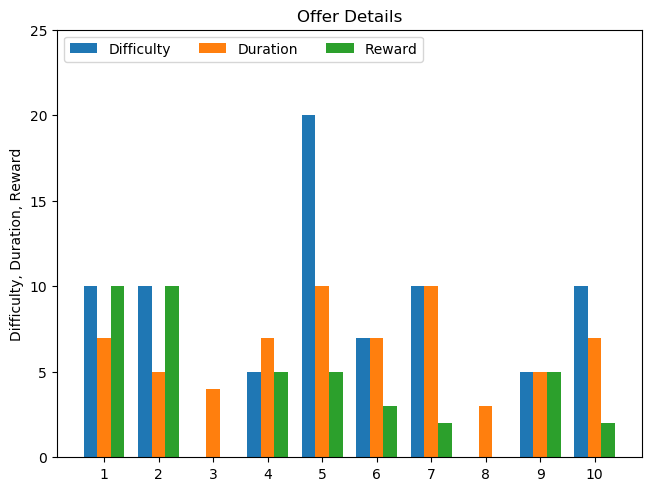

In [41]:
offers = tuple(list(portfolio_df.offer))
offer_details = {
    'Difficulty': list(portfolio['difficulty']),
    'Duration': list(portfolio['duration']),
    'Reward': list(portfolio['reward']),
}
x_labels = offers

x = np.arange(len(offers))  
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in offer_details.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difficulty, Duration, Reward')
ax.set_title('Offer Details')
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 25)

plt.show()

# plt.savefig(os.path.join('photos/diff_duration_reward.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

>The graph above shows that there the value of difficulty and reward are not always proportional. 

* Offers 1, 2, 4 and 9 are BOGO promotions. For these promotions, the reward and difficulty are always equal as they are 'Buy 1 Get 1 Free' offers. There is also a good variation of duration for these offers. 

* Offers 5, 6, 7, and 10 are discount offers. For these offer, the difficulty is much higher than the reward. As the difficulty is the amount that needs to be spent to attain the discount, this makes complete sense as the reward is merely a deduction from the purchase made. with the exception of offer # 10, discount durations usually have a longer duration than BOGO offers.

* Information offers just advertise ongoing promotions so they do not have values for difficulty or reward. 

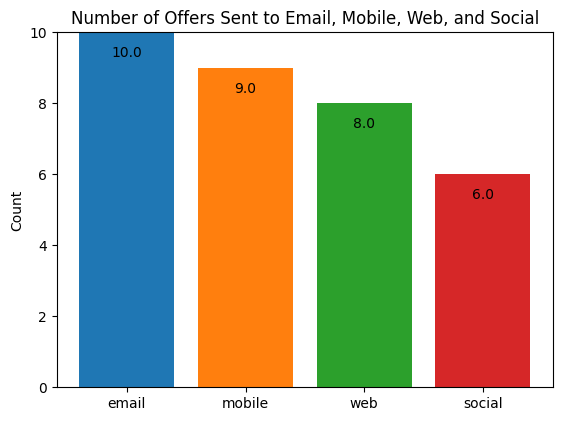

In [14]:
# create sample data
data = {
    'email': list(portfolio_df['email']),
    'mobile': list(portfolio_df['mobile']),
    'web': list(portfolio_df['web']),
    'social': list(portfolio_df['social'])
}

df = pd.DataFrame(data)


value_counts = df.apply(pd.Series.value_counts)

x_labels = value_counts.columns
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
rects = ax.bar(x, value_counts.loc[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, -20),  
                textcoords="offset points",
                ha='center', va='bottom')


ax.set_ylabel('Count')
ax.set_title('Number of Offers Sent to Email, Mobile, Web, and Social')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, len(df))

plt.subplots_adjust(top=0.85)

plt.show()

# plt.savefig(os.path.join('photos/offer_channels.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

>The graph shows that most of the offers are sent through email followed by the mobile app.

# Exploration and Cleaning of Profile Dataframe
The profile dataframe consists of 17000 rows and 5 columns: gender, age, user id, the date when the user became a member and the income of the user.

In [42]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [43]:
profile.shape

(17000, 5)

In [44]:
len(profile.id.unique())

17000

In [45]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [46]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


### OBSERVATIONS
* The dataframe contains NaN values.
* There are ages equal to 118. 

### ACTIONS
* Remove NA values.
* Remove ages that are equal to 118.
* Find the membership duration in days using the difference between the maximum 'became member on' date and the actual 'became member on' date
* Rearrange the columns.
* Save the new table to csv


In [47]:
profile_df = profile.dropna()

In [48]:
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'].astype(str), format='%Y%m%d')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
print(min(profile_df['became_member_on']))
print(max(profile_df['became_member_on']))

2013-07-29 00:00:00
2018-07-26 00:00:00


In [50]:
profile_df['membership_duration'] = round((max(profile_df['became_member_on']) - profile_df["became_member_on"]).dt.days) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
profile_df.shape

(14825, 6)

In [86]:
len(profile_df['id'].unique())

14825

In [51]:
profile_df = profile_df[["id", "age", "gender", "income", "became_member_on", "membership_duration"]]

In [52]:
profile_df.head()

,id,age,gender,income,became_member_on,membership_duration
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443
5,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2018-04-26,91
8,389bc3fa690240e798340f5a15918d5c,65,M,53000.0,2018-02-09,167
12,2eeac8d8feae4a8cad5a6af0499a211d,58,M,51000.0,2017-11-11,257


In [22]:
# profile_df.to_csv('profile_df.csv', index = False)

In [ ]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data = profile_df,
    x=profile_df['age'], 
    hue=profile_df['gender'],
    fill=True, 
    common_norm=False, 
    palette="RdPu",
    alpha=.5, 
    linewidth=0,
)
plt.legend(labels=['Other', 'Male', 'Female'])
plt.title('Age and Gender Distribution of Starbucks Customers')
plt.show()

# plt.savefig(os.path.join('photos/age_gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

![Age Distribution by Gender](photos/eda_age_gender.png)

<Axes: title={'center': 'Gender of Starbucks Customers'}, ylabel='gender'>

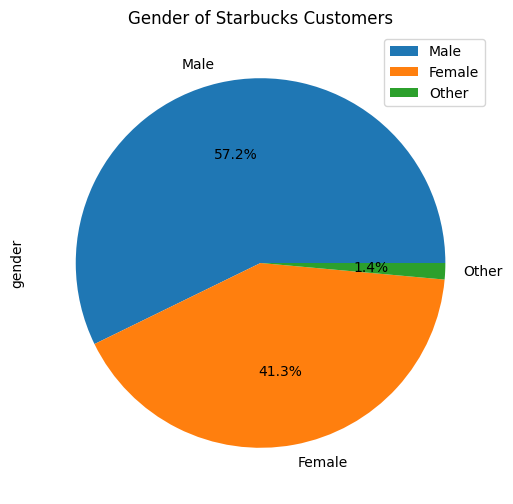

In [28]:
profile_df['gender'].value_counts().plot.pie(legend = True, 
                                             labels = ['Male', 'Female', 'Other'], 
                                             figsize=(11, 6),
                                             title = 'Gender of Starbucks Customers',
                                             autopct='%1.1f%%'
                                            )

# plt.savefig(os.path.join('photos/gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

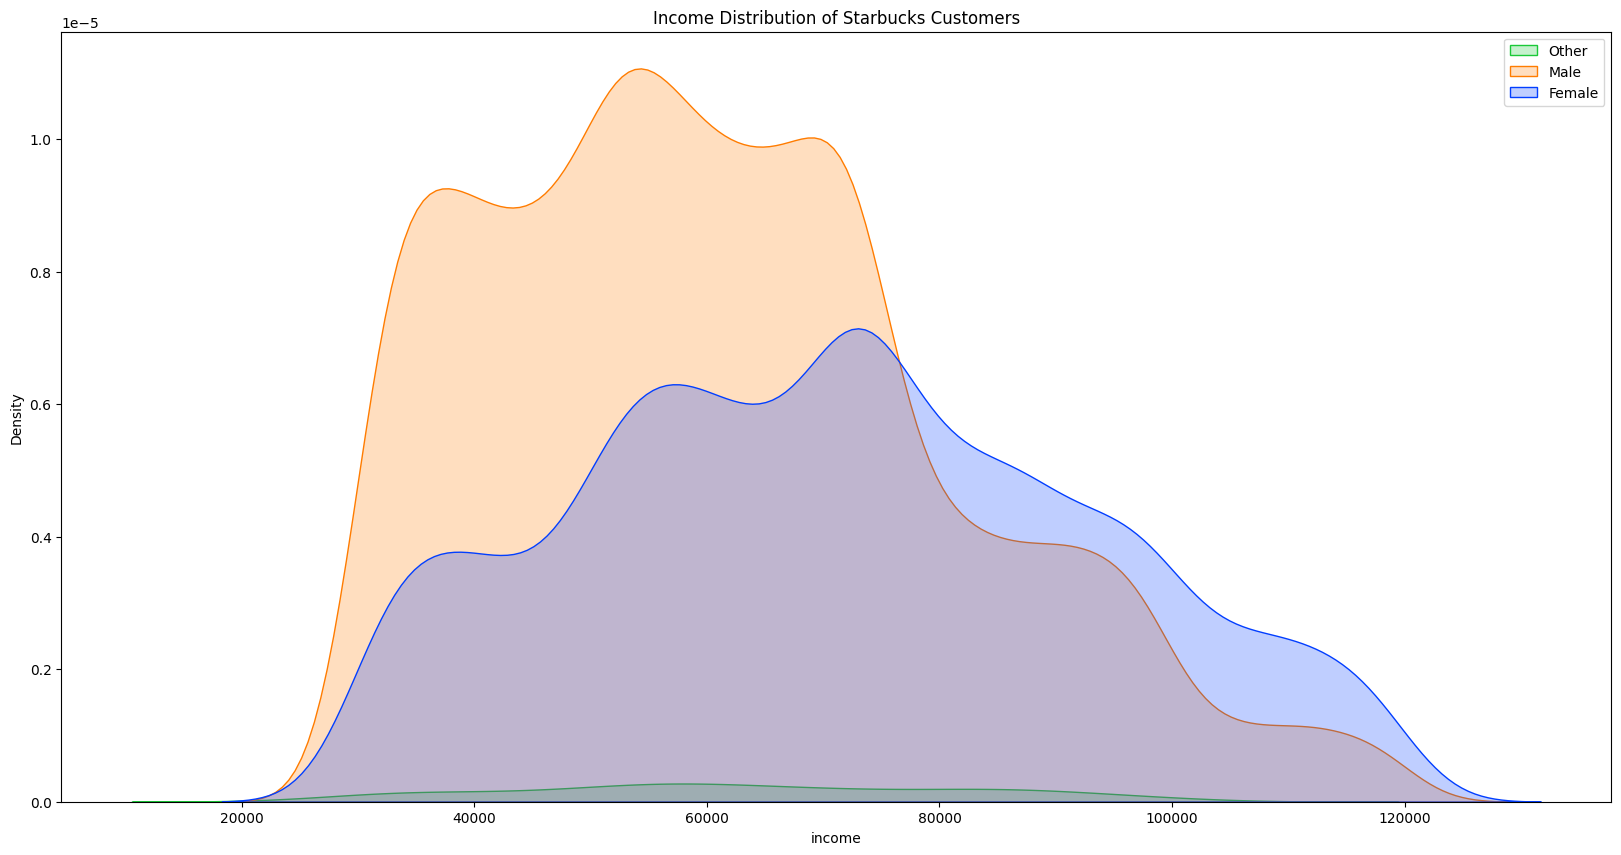

In [30]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data=profile_df, 
    x="income", 
    hue="gender",
    fill = True,
    palette="bright"
)
plt.legend(labels=['Other', 'Male', 'Female'])
plt.title('Income Distribution of Starbucks Customers')
plt.show()

# plt.savefig(os.path.join('photos/income_distribution.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

The three graphs above show that:

* The app has more male users than female users. 
* There are more males aged 18 to 40 than there are females.
* The majority of the users are between 45 to 73 years of age.
* Female users have a higher income than the male users.
* Majority of the users earn around 49,000 to 80,000.

# Transcript Dataframe
The transcript dataframe would probably be the most complex among all the dataframes included in this project. It contains the following:

* event (str) - record description (transaction, offer received, offer viewed, offer completed)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - consists of an offer id for offer received and viewed, an offer id and reward for offer completed, and the amount spent for transactions.  

Transaction events contain a value for amount spent. Both offer received and offer viewed contain the offer id, whereas offer completed contains both the offer id and the reward received.

In [77]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [78]:
len(transcript['person'].unique())

17000

In [79]:
len(profile_df['id'].unique())

14825

In [ ]:
len(profile['id'].unique())

17000

In [81]:
not_in_profile = set(transcript['person']) - set(profile_df['id'])
print("Number of persons not in profile:", len(not_in_profile))

Number of persons not in profile: 2175


In [82]:
not_in_profile = set(transcript['person']) - set(profile_df['id'])
num_entries_not_in_profile = sum(transcript['person'].isin(not_in_profile))
print("Number of entries with person not in profile:", num_entries_not_in_profile)

Number of entries with person not in profile: 33772


In [83]:
306534 - 33772

272762

In [64]:
transcript.shape

(306534, 4)

> As profile_df has all the unique values for id, a left join to profile_df will remove all the rows with the persons that are not in profile_df.

In [87]:
transcript_df = transcript.copy()

In [88]:
transcript_profile = pd.merge(
    profile_df,
    transcript_df,
    how = "left",
    left_on = "id",
    right_on = "person"
)

In [89]:
transcript_profile.shape

(272762, 10)

In [90]:
transcript_profile.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
value                  0
time                   0
dtype: int64

In [91]:
transcript_profile.head(5)

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528


In [92]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [93]:
transcript_profile.event.value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

## Transaction
* Create a dataframe for transactions.
* Extract the amount spent for each transaction.

In [94]:
transcript_profile[transcript_profile.event == 'transaction'].head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144


In [95]:
transaction_df = transcript_profile[transcript_profile.event == 'transaction']
transaction_df.shape

(123957, 10)

In [96]:
transcript_profile.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
value                  0
time                   0
dtype: int64

In [97]:
transaction_df['amount_spent'] = transaction_df['value'].apply(lambda x: x['amount'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
transaction_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time,amount_spent
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18,21.51
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144,32.28
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528,23.22
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,19.89
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,17.78


In [99]:
transaction_df = transaction_df.drop('value', axis = 1)

In [100]:
transaction_df.drop_duplicates()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,528,23.22
8,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89
10,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78
...,...,...,...,...,...,...,...,...,...,...
272752,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,84,25.19
272753,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,96,21.53
272756,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,480,30.57
272758,e4052622e5ba45a8b96b59aba68cf068,62,F,82000.0,2017-07-22,369,e4052622e5ba45a8b96b59aba68cf068,transaction,486,19.47


In [101]:
transaction_df.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
time                   0
amount_spent           0
dtype: int64

In [102]:
transaction_df = transaction_df.dropna()

In [103]:
transaction_df.shape

(123957, 10)

In [73]:
# transaction_df.to_csv('data/transaction.csv', index = False)

## Offer Received, Viewed, Completed
* Create separate dataframes for offer received, offer viewed and offer completed.
* Extract and feature engineer new columns for the keys in the values column.

In [383]:
offer_received_df = transcript_profile[transcript_profile.event == 'offer received']
offer_viewed_df = transcript_profile[transcript_profile.event == 'offer viewed']
offer_completed_df = transcript_profile[transcript_profile.event == 'offer completed']

In [384]:
print(offer_received_df.shape)
print(offer_viewed_df.shape)
print(offer_completed_df.shape)

(66501, 10)
(49860, 10)
(32444, 10)


In [385]:
offer_received_df.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
value                  0
time                   0
dtype: int64

In [386]:
offer_received_df['offer_id'] = offer_received_df['value'].apply(lambda x: x['offer id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [387]:
offer_received_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time,offer_id
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,3f207df678b143eea3cee63160fa8bed
6,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
11,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,5a8bc65990b245e5a138643cd4eb9837
16,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},408,ae264e3637204a6fb9bb56bc8210ddfd


In [388]:
offer_received_df.drop('value', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [389]:
offer_received_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,offer_id
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed
6,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
11,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837
16,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd


In [390]:
offer_viewed_df['offer_id'] = offer_viewed_df['value'].apply(lambda x: x['offer id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [391]:
offer_viewed_df.drop('value', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [392]:
offer_viewed_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,offer_id
7,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9
12,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,5a8bc65990b245e5a138643cd4eb9837
17,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,408,ae264e3637204a6fb9bb56bc8210ddfd
23,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,582,f19421c1d4aa40978ebb69ca19b0e20d
25,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2018-04-26,91,e2127556f4f64592b11af22de27a7932,offer viewed,18,2906b810c7d4411798c6938adc9daaa5


In [393]:
offer_completed_df['offer_id'] = offer_completed_df['value'].apply(lambda x: x['offer_id'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [394]:
offer_completed_df.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,value,time,offer_id
5,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,528,9b98b8c7a33c4b65b9aebfe6a799e6d9
9,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,9b98b8c7a33c4b65b9aebfe6a799e6d9
20,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510,ae264e3637204a6fb9bb56bc8210ddfd
21,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,510,f19421c1d4aa40978ebb69ca19b0e20d
34,e2127556f4f64592b11af22de27a7932,68,M,70000.0,2018-04-26,91,e2127556f4f64592b11af22de27a7932,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,522,9b98b8c7a33c4b65b9aebfe6a799e6d9


In [395]:
not_viewed = set(offer_received_df['offer_id']) - set(offer_viewed_df['offer_id'])
num_not_viewed = len(not_viewed)
print("Number of offers not viewed:", num_not_viewed)
offer_received_df.isna().sum()

Number of offers not viewed: 0


id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
time                   0
offer_id               0
dtype: int64

In [396]:
offer_viewed_df.isna().sum()

id                     0
age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
event                  0
time                   0
offer_id               0
dtype: int64

In [397]:
not_in_viewed = set(offer_received_df['offer_id']) - set(offer_viewed_df['offer_id'])
num_entries_not_in_viewed= sum(offer_received_df['offer_id'].isin(not_in_viewed))
print("Number of entries with offers not viewed:", num_entries_not_in_viewed)

Number of entries with offers not viewed: 0


In [398]:
merged_received = offer_received_df.copy()

In [399]:
merged_viewed = offer_viewed_df.copy()

> Now that all the values have been extracted, the three tables will be merged. The challenge here will be the fact that a person can have the same offer, rendering our uniqe values ununique. In this case, using other columns (like age, gender, income, became_member_on) will be necessary in maintaining data quality.

In [400]:
received_viewed_completed = pd.merge(
    merged_received,
    merged_viewed,
    how = "outer",
    on = ["person", "offer_id", "age", "gender", "income", "became_member_on", "membership_duration"],
    indicator = True,
    validate = 'many_to_many'
)

In [401]:
received_viewed_completed.shape

(82834, 14)

In [402]:
received_viewed_completed.head()

,id_x,age,gender,income,became_member_on,membership_duration,person,event_x,time_x,offer_id,id_y,event_y,time_y,_merge
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,left_only
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,NaN,NaN,left_only
2,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6.0,both
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216.0,both
4,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,408.0,both


In [403]:
received_viewed_completed.isna().sum()

id_x                       0
age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
event_x                    0
time_x                     0
offer_id                   0
id_y                   14403
event_y                14403
time_y                 14403
_merge                     0
dtype: int64

In [404]:
condition_met = all(received_viewed_completed['id_x'] == received_viewed_completed['person'])
if condition_met:
    print("All values in the 'id_x' and 'person' columns are equal.")
else:
    print("There are some values in the 'id_x' and 'person' columns that are not equal.")

All values in the 'id_x' and 'person' columns are equal.


In [405]:
condition_met = all(received_viewed_completed['id_y'] == received_viewed_completed['id_x'])
if condition_met:
    print("All values in the 'id_x' and 'person' columns are equal.")
else:
    print("There are some values in the 'id_x' and 'person' columns that are not equal.")

There are some values in the 'id_x' and 'person' columns that are not equal.


In [406]:
num_not_equal = sum(received_viewed_completed['id_y'] != received_viewed_completed['id_x'])
print("Number of values that are not equal:", num_not_equal)

Number of values that are not equal: 14403


In [407]:
received_viewed_completed = received_viewed_completed.drop(['id_x', 'id_y'], axis = 1)

In [408]:
received_viewed_completed.shape

(82834, 12)

In [409]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,event_x,time_x,offer_id,event_y,time_y,_merge
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,left_only
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,NaN,left_only
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer viewed,6.0,both
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,offer viewed,216.0,both
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,offer viewed,408.0,both


In [410]:
merged_completed = offer_completed_df.copy()

In [411]:
received_viewed_completed = pd.merge(
    received_viewed_completed,
    merged_completed,
    how = 'outer',
    on = ["person", "offer_id", "age", "gender", "income", "became_member_on", "membership_duration"]
)

In [412]:
received_viewed_completed.shape

(102693, 16)

In [413]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,event_x,time_x,offer_id,event_y,time_y,_merge,id,event,value,time
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,left_only,0610b486422d4921ae7d2bf64640c50b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,528.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,NaN,left_only,NaN,NaN,NaN,NaN
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer viewed,6.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,offer viewed,216.0,both,NaN,NaN,NaN,NaN
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,offer viewed,408.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510.0


In [414]:
received_viewed_completed.isna().sum()

age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
event_x                    0
time_x                     0
offer_id                   0
event_y                15081
time_y                 15081
_merge                     0
id                     37701
event                  37701
value                  37701
time                   37701
dtype: int64

In [415]:
recieved_viewed_completed = received_viewed_completed.rename(columns={'event_x': 'offer_received', 'time_x': 'time_received', 'event_y': 'offer_viewed', 'time_y': 'time_viewed', 'event': 'offer_completed', 'time': 'time_completed'}, inplace = True)

In [416]:
received_viewed_completed.isna().sum()

age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
offer_received             0
time_received              0
offer_id                   0
offer_viewed           15081
time_viewed            15081
_merge                     0
id                     37701
offer_completed        37701
value                  37701
time_completed         37701
dtype: int64

In [417]:
received_viewed_completed[['offer_received','offer_viewed', 'offer_completed']]

,offer_received,offer_viewed,offer_completed
0,offer received,NaN,offer completed
1,offer received,NaN,NaN
2,offer received,offer viewed,offer completed
3,offer received,offer viewed,NaN
4,offer received,offer viewed,offer completed
...,...,...,...
102688,offer received,offer viewed,offer completed
102689,offer received,offer viewed,offer completed
102690,offer received,NaN,NaN
102691,offer received,NaN,NaN


In [418]:
received_viewed_completed['offer_viewed'] = received_viewed_completed['offer_viewed'].fillna(0)

In [419]:
received_viewed_completed.loc[received_viewed_completed['offer_viewed'] == 'offer viewed', 'offer_viewed'] = 1

In [420]:
received_viewed_completed['offer_viewed'].value_counts()

1    87612
0    15081
Name: offer_viewed, dtype: int64

In [421]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,offer_received,time_received,offer_id,offer_viewed,time_viewed,_merge,id,offer_completed,value,time_completed
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,NaN,left_only,0610b486422d4921ae7d2bf64640c50b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,528.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,0,NaN,left_only,NaN,NaN,NaN,NaN
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,1,216.0,both,NaN,NaN,NaN,NaN
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,both,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510.0


In [422]:
received_viewed_completed['offer_completed'] = received_viewed_completed['offer_completed'].fillna(0)

In [423]:
received_viewed_completed.loc[received_viewed_completed['offer_completed'] == 'offer completed', 'offer_completed'] = 1

In [424]:
received_viewed_completed['offer_completed'].value_counts()

1    64992
0    37701
Name: offer_completed, dtype: int64

In [425]:
received_viewed_completed.loc[received_viewed_completed['offer_received'] == 'offer received', 'offer_received'] = 1

In [426]:
received_viewed_completed.isna().sum()

age                        0
gender                     0
income                     0
became_member_on           0
membership_duration        0
person                     0
offer_received             0
time_received              0
offer_id                   0
offer_viewed               0
time_viewed            15081
_merge                     0
id                     37701
offer_completed            0
value                  37701
time_completed         37701
dtype: int64

In [427]:
received_viewed_completed['reward_received'] = received_viewed_completed[received_viewed_completed.offer_completed == 1]['value'].apply(lambda x: x['reward'])

In [428]:
received_viewed_completed.drop(['id', 'value'], axis = 1, inplace = True)

In [429]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,offer_received,time_received,offer_id,offer_viewed,time_viewed,_merge,offer_completed,time_completed,reward_received
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,NaN,left_only,1,528.0,5.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,504,3f207df678b143eea3cee63160fa8bed,0,NaN,left_only,0,NaN,NaN
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,both,1,132.0,5.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,168,5a8bc65990b245e5a138643cd4eb9837,1,216.0,both,0,NaN,NaN
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,both,1,510.0,10.0


> To ensure data quality, inconsistencies need to be removed by comparing the times that the offer was received, viewed and completed

> The offer cannot be viewed before it was received. Time viewed cannot be less than time received.

In [434]:
# Identify the index of the rows that match the condition
received_viewed_inconsistencies = received_viewed_completed[received_viewed_completed.time_viewed < received_viewed_completed.time_received].index
print(received_viewed_inconsistencies)

# Drop the rows with the identified indices
received_viewed_completed.drop(index=received_viewed_inconsistencies, inplace=True)

Int64Index([    14,     15,     20,     41,     49,     50,     51,     55,
                56,     57,
            ...
            102582, 102583, 102592, 102593, 102608, 102609, 102638, 102639,
            102647, 102657],
           dtype='int64', length=14900)


>The offer cannot be completed before it was received

In [439]:
len(received_viewed_completed[received_viewed_completed.time_completed < received_viewed_completed.time_received])

5272

In [440]:
# Identify the index of the rows that match the condition
received_completed_inconsistencies = received_viewed_completed[received_viewed_completed.time_completed < received_viewed_completed.time_received].index
print(received_completed_inconsistencies)

# Drop the rows with the identified indices
received_viewed_completed.drop(index=received_completed_inconsistencies, inplace=True)

Int64Index([    16,     34,     42,     52,     84,     87,     96,     97,
               126,    136,
            ...
            102517, 102556, 102567, 102584, 102594, 102622, 102627, 102640,
            102658, 102675],
           dtype='int64', length=5272)


In [445]:
received_viewed_completed['offer_viewed'].value_counts()

1    67870
0    14651
Name: offer_viewed, dtype: int64

In [446]:
received_viewed_completed['time_viewed'].isna().sum()

14651

In [447]:
received_viewed_completed['offer_completed'].value_counts()

1    48256
0    34265
Name: offer_completed, dtype: int64

In [448]:
received_viewed_completed['time_completed'].isna().sum()

34265

In [441]:
received_viewed_completed.shape

(82521, 15)

In [449]:
received_viewed_completed['reward_received'] = received_viewed_completed['reward_received'].fillna(0)

In [450]:
received_viewed_completed['time_viewed'] = received_viewed_completed['time_viewed'].fillna(0)

In [451]:
received_viewed_completed['time_completed'] = received_viewed_completed['time_completed'].fillna(0)

In [452]:
received_viewed_completed.head()

,age,gender,income,became_member_on,membership_duration,person,offer_received,time_received,offer_id,offer_viewed,time_viewed,_merge,offer_completed,time_completed,reward_received
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.0,left_only,1,528.0,5.0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,1,504,3f207df678b143eea3cee63160fa8bed,0,0.0,left_only,0,0.0,0.0
2,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,both,1,132.0,5.0
3,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,168,5a8bc65990b245e5a138643cd4eb9837,1,216.0,both,0,0.0,0.0
4,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,both,1,510.0,10.0


In [453]:
received_viewed_completed.isna().sum()

age                    0
gender                 0
income                 0
became_member_on       0
membership_duration    0
person                 0
offer_received         0
time_received          0
offer_id               0
offer_viewed           0
time_viewed            0
_merge                 0
offer_completed        0
time_completed         0
reward_received        0
dtype: int64

In [457]:
complete_df = pd.merge(
    portfolio_df,
    received_viewed_completed,
    how = 'inner',
    left_on = 'id',
    right_on = 'offer_id'
)

In [458]:
complete_df.shape

(82521, 27)

In [462]:
complete_df.head()

,id,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,...,person,offer_received,time_received,offer_id,offer_viewed,time_viewed,_merge,offer_completed,time_completed,reward_received
0,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,both,1,510.0,10.0
1,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,aa4862eba776480b8bb9c68455b8c2e1,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,432.0,both,1,426.0,10.0
2,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,e12aeaf2d47d42479ea1c4ac3d8286c6,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,414.0,both,0,0.0,0.0
3,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,62cf5e10845442329191fc246e7bcea3,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,414.0,both,1,486.0,10.0
4,ae264e3637204a6fb9bb56bc8210ddfd,1,bogo,10,7,168,10,"[email, mobile, social]",0,1,...,a448667f336b42c9a66fc5ffd5d73772,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,438.0,both,0,0.0,0.0


In [463]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82521 entries, 0 to 82520
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   82521 non-null  object        
 1   offer                82521 non-null  int64         
 2   offer_type           82521 non-null  object        
 3   difficulty           82521 non-null  int64         
 4   duration             82521 non-null  int64         
 5   duration_hr          82521 non-null  int64         
 6   reward               82521 non-null  int64         
 7   channels             82521 non-null  object        
 8   web                  82521 non-null  int64         
 9   email                82521 non-null  int64         
 10  social               82521 non-null  int64         
 11  mobile               82521 non-null  int64         
 12  age                  82521 non-null  int64         
 13  gender               82521 non-

In [466]:
# complete_df.drop(['id', '_merge'], axis = 1, inplace = True)

In [468]:
complete_df = pd.read_csv('data/complete.csv')

In [469]:
complete_df['received_viewed'] =  complete_df['time_viewed'] - complete_df['time_received']

In [470]:
complete_df['viewed_completed'] = complete_df['time_completed'] - complete_df['time_viewed']

In [471]:
complete_df['received_completed_diff'] =  complete_df['time_completed'] - complete_df['time_received']

In [472]:
complete_df['duration_diff'] = complete_df['duration_hr'] - complete_df['received_completed_diff']

In [473]:
complete_df.head()

,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,...,offer_id,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff
0,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0
1,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,432.0,1,426.0,10.0,24.0,-6.0,18.0,150.0
2,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,414.0,0,0.0,0.0,6.0,-414.0,-408.0,576.0
3,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,414.0,1,486.0,10.0,6.0,72.0,78.0,90.0
4,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,438.0,0,0.0,0.0,30.0,-438.0,-408.0,576.0


> Although the time viewed can be 0, the offer cannot be completed before it was viewed. Therefore, time completed cannot be greater than time viewed.

In [478]:
viewed_completed_anomalies = complete_df[(complete_df.time_viewed > complete_df.time_completed) & (complete_df.time_completed != 0)].index
complete_df.drop(index = viewed_completed_anomalies, inplace = True)

> The user should not receive a reward if the offer was completed after the offer duration is over.

In [489]:
completed_reward_anomalies = complete_df[(complete_df.offer_completed == 1) & (complete_df.duration_diff < 0) & (complete_df.reward_received > 0)].index
complete_df.drop(index = completed_reward_anomalies, inplace = True)

> The reward indicated in the portfolio should be the same as the reward received

In [501]:
reward_anomaly = complete_df[(complete_df.reward != complete_df.reward_received) & (complete_df.duration_hr >= complete_df.duration_diff)].index
complete_df.drop(index = reward_anomaly, inplace = True)

In [502]:
complete_df.shape

(60180, 29)

In [503]:
complete_df['viewed_and_completed'] = ((complete_df['offer_viewed'] == 1) & complete_df["offer_completed"] == 1)

In [506]:
complete_df['valid_complete'] = complete_df['viewed_and_completed'].apply(lambda x: 1 if x is True else 0)

In [509]:
complete_df.drop('viewed_and_completed', axis = 1, inplace = True)

In [510]:
complete_df['valid_complete'].value_counts()

0    35241
1    24939
Name: valid_complete, dtype: int64

In [511]:
complete_df.head()

,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
0,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0,1
2,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,414.0,0,0.0,0.0,6.0,-414.0,-408.0,576.0,0
3,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,414.0,1,486.0,10.0,6.0,72.0,78.0,90.0,1
4,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,438.0,0,0.0,0.0,30.0,-438.0,-408.0,576.0,0
7,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,510.0,1,510.0,10.0,6.0,0.0,6.0,162.0,1


In [512]:
# complete_df.to_csv('data/complete.csv', index = False)

In [580]:
transaction = pd.read_csv('data/transaction.csv')
complete_df = pd.read_csv('data/complete.csv')

In [581]:
transaction.shape

(123957, 10)

In [582]:
transaction_offers = pd.merge(
    transaction,
    complete_df,
    how = "left",
    left_on = "id",
    right_on = "person"
)

In [583]:
transaction_offers.shape

(520928, 40)

In [584]:
transaction_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520928 entries, 0 to 520927
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       520928 non-null  object 
 1   age_x                    520928 non-null  int64  
 2   gender_x                 520928 non-null  object 
 3   income_x                 520928 non-null  float64
 4   became_member_on_x       520928 non-null  object 
 5   membership_duration_x    520928 non-null  int64  
 6   person_x                 520928 non-null  object 
 7   event                    520928 non-null  object 
 8   time                     520928 non-null  int64  
 9   amount_spent             520928 non-null  float64
 10  offer                    520806 non-null  float64
 11  offer_type               520806 non-null  object 
 12  difficulty               520806 non-null  float64
 13  duration                 520806 non-null  float64
 14  dura

In [585]:
transaction_offers.head()

,id,age_x,gender_x,income_x,became_member_on_x,membership_duration_x,person_x,event,time,amount_spent,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51,...,0.0,0.0,0.0,0.0,0.0,-504.0,0.0,-504.0,600.0,0.0
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51,...,0.0,0.0,1.0,528.0,5.0,-408.0,528.0,120.0,48.0,0.0
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28,...,0.0,0.0,0.0,0.0,0.0,-504.0,0.0,-504.0,600.0,0.0
3,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28,...,0.0,0.0,1.0,528.0,5.0,-408.0,528.0,120.0,48.0,0.0
4,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,528,23.22,...,0.0,0.0,0.0,0.0,0.0,-504.0,0.0,-504.0,600.0,0.0


In [586]:
transaction_offers[transaction_offers.age_x != transaction_offers.age_y][['person_x', 'person_y', 'age_x', 'age_y', 'offer_type', 'offer_received']]

,person_x,person_y,age_x,age_y,offer_type,offer_received
26368,c6e579c6821c41d1a7a6a9cf936e91bb,NaN,72,NaN,NaN,NaN
26369,c6e579c6821c41d1a7a6a9cf936e91bb,NaN,72,NaN,NaN,NaN
26370,c6e579c6821c41d1a7a6a9cf936e91bb,NaN,72,NaN,NaN,NaN
26371,c6e579c6821c41d1a7a6a9cf936e91bb,NaN,72,NaN,NaN,NaN
28621,b0d214d419dc495e84bda1eebf17210b,NaN,53,NaN,NaN,NaN
...,...,...,...,...,...,...
474802,10ba807d1eba42c1a308633e8918bed3,NaN,52,NaN,NaN,NaN
474803,10ba807d1eba42c1a308633e8918bed3,NaN,52,NaN,NaN,NaN
474804,10ba807d1eba42c1a308633e8918bed3,NaN,52,NaN,NaN,NaN
474805,10ba807d1eba42c1a308633e8918bed3,NaN,52,NaN,NaN,NaN


In [587]:
transaction_offers.drop(['age_y', 'gender_y', 'income_y', 'became_member_on_y','membership_duration_y', 'person_y', 'id'], 
                        axis = 1, 
                        inplace = True)

In [588]:
transaction_offers.isna().sum()

age_x                        0
gender_x                     0
income_x                     0
became_member_on_x           0
membership_duration_x        0
person_x                     0
event                        0
time                         0
amount_spent                 0
offer                      122
offer_type                 122
difficulty                 122
duration                   122
duration_hr                122
reward                     122
channels                   122
web                        122
email                      122
social                     122
mobile                     122
offer_received             122
time_received              122
offer_id                   122
offer_viewed               122
time_viewed                122
offer_completed            122
time_completed             122
reward_received            122
received_viewed            122
viewed_completed           122
received_completed_diff    122
duration_diff              122
valid_co

In [589]:
transaction_offers.rename(columns = {'age_x': 'age', 'gender_x': 'gender', 'income_x': 'income', 'became_member_on_x': 'became_member_on',
       'membership_duration_x': 'membership_duration', 'person_x': 'person'}, inplace = True)

In [590]:
transaction_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520928 entries, 0 to 520927
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      520928 non-null  int64  
 1   gender                   520928 non-null  object 
 2   income                   520928 non-null  float64
 3   became_member_on         520928 non-null  object 
 4   membership_duration      520928 non-null  int64  
 5   person                   520928 non-null  object 
 6   event                    520928 non-null  object 
 7   time                     520928 non-null  int64  
 8   amount_spent             520928 non-null  float64
 9   offer                    520806 non-null  float64
 10  offer_type               520806 non-null  object 
 11  difficulty               520806 non-null  float64
 12  duration                 520806 non-null  float64
 13  duration_hr              520806 non-null  float64
 14  rewa

In [591]:
transaction_offers.columns

Index(['age', 'gender', 'income', 'became_member_on', 'membership_duration',
       'person', 'event', 'time', 'amount_spent', 'offer', 'offer_type',
       'difficulty', 'duration', 'duration_hr', 'reward', 'channels', 'web',
       'email', 'social', 'mobile', 'offer_received', 'time_received',
       'offer_id', 'offer_viewed', 'time_viewed', 'offer_completed',
       'time_completed', 'reward_received', 'received_viewed',
       'viewed_completed', 'received_completed_diff', 'duration_diff',
       'valid_complete'],
      dtype='object')

In [593]:
transaction_offers['valid_complete'].value_counts()

0.0    268051
1.0    252755
Name: valid_complete, dtype: int64

In [594]:
transaction_offers['offer_type'].value_counts()

discount         208739
bogo             194232
informational    117835
Name: offer_type, dtype: int64

In [595]:
transaction_offers['time'].isna().sum()

0

In [596]:
transaction_offers['time_completed'].isna().sum()

122

In [598]:
transaction_offers[(transaction_offers['offer_completed'].isna()) & (transaction_offers.time != transaction_offers.time_completed)]

,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent,offer,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
26368,72,F,35000.0,2017-10-14,285,c6e579c6821c41d1a7a6a9cf936e91bb,transaction,174,0.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26369,72,F,35000.0,2017-10-14,285,c6e579c6821c41d1a7a6a9cf936e91bb,transaction,222,1.91,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26370,72,F,35000.0,2017-10-14,285,c6e579c6821c41d1a7a6a9cf936e91bb,transaction,408,1.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26371,72,F,35000.0,2017-10-14,285,c6e579c6821c41d1a7a6a9cf936e91bb,transaction,570,3.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28621,53,F,32000.0,2017-01-26,546,b0d214d419dc495e84bda1eebf17210b,transaction,72,3.44,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474802,52,M,47000.0,2018-07-01,25,10ba807d1eba42c1a308633e8918bed3,transaction,150,2.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474803,52,M,47000.0,2018-07-01,25,10ba807d1eba42c1a308633e8918bed3,transaction,252,0.35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474804,52,M,47000.0,2018-07-01,25,10ba807d1eba42c1a308633e8918bed3,transaction,408,8.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474805,52,M,47000.0,2018-07-01,25,10ba807d1eba42c1a308633e8918bed3,transaction,600,1.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> If it is a completed offer then the the transaction time should be equal to the time it was completed

In [599]:
time_anomaly = transaction_offers[(transaction_offers.offer_type == 'bogo') & (~transaction_offers.time.isnull()) & (transaction_offers.time != transaction_offers.time_completed)].index
transaction_offers.drop(index=time_anomaly, inplace=True)

In [600]:
transaction_offers.shape

(340436, 33)

In [601]:
more_time_anomaly = transaction_offers[(transaction_offers.offer_type == 'discount') & (~transaction_offers.time.isnull()) & (transaction_offers.time != transaction_offers.time_completed)].index
transaction_offers.drop(index=more_time_anomaly, inplace=True)


In [602]:
transaction_offers.shape

(148365, 33)

In [39]:
# transaction_offers.to_csv('data/transaction_offers.csv', index = False)